In [1]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/c5/89/ce1c7dc497f9a20644f6a7d2dd5bce6378a48321955178197fa3b55d6fe3/pandas-2.1.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.22.4 from https://files.pythonhosted.org/packages/b7/db/4d37359e2c9cf8bf071c08b8a6f7374648a5ab2e76e2e22e3b808f81d507/numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata
  Using cached numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata (5.7 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.1 MB/s eta 0:00:11
   ---------- ----------------------------- 2.9/11.1 MB 30.5 MB/s eta 0:00:01
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
theano-pymc 1.1.2 requires filelock, which is not installed.
theano-pymc 1.1.2 requires scipy>=0.14, which is not installed.
arviz 0.12.1 requires matplotlib>=3.0, which is not installed.
arviz 0.12.1 requires scipy>=0.19, which is not installed.
arviz 0.12.1 requires xarray>=0.16.1, which is not installed.
xarray-einstats 0.5.1 requires scipy>=1.6, which is not installed.
xarray-einstats 0.5.1 requires xarray>=2022.09.0, which is not installed.


In [2]:
!pip install webdriver_manager

  Obtaining dependency information for webdriver_manager from https://files.pythonhosted.org/packages/19/5a/a16653bfce685c9832217d377f52065351eeac9862e44e2996cd81f3bb4d/webdriver_manager-4.0.0-py2.py3-none-any.whl.metadata


In [3]:
!pip install PyMySQL

  Obtaining dependency information for PyMySQL from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
  Using cached PyMySQL-1.1.0-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.0-py3-none-any.whl (44 kB)


In [4]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/f9/2f/9c6eef6487faca5006ae1ba43cf6ab627c7e3d2a7ec5a3b8728e2105472d/selenium-4.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Using cached trio-0.22.2-py3-none-any.whl.metadata (4.7 kB)
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/f2/25/868488d8b05104e3d1bf162565bbadd5fe6d62bf903710e6402c3aaceb1e/trio_websocket-0.10.4-py3-none-any.whl.metadata
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   -----------------------------

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pymysql
import time

In [2]:
# 크롬 드라이버의 옵션을 설정할 객체
chrome_options = Options()

In [3]:
# 브라우저 꺼짐 방지
chrome_options.add_experimental_option("detach", True)

In [4]:
# 네이버 영화 검색 사이트 url
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%98%81%ED%99%94"

In [5]:
# 크롬 드라이버에 옵션 설정
driver = webdriver.Chrome(options=chrome_options)

In [6]:
# 페이지 로딩까지 최대 10초 대기 설정
driver.implicitly_wait(10)

In [7]:
# 네이버 영화 검색 페이지 실행
driver.get(url)

In [8]:
# id 속성이 nx_query인 객체를 search_box에 대입
search_box = driver.find_element(By.ID, "nx_query")
# 기존에 입력한 메시지 삭제
search_box.clear()

In [10]:
movie = "범죄도시 3"
search_box.send_keys("영화 ", movie)

In [11]:
# 클래스 속성이 bt_search인 객체 리턴
search_button = driver.find_element(By.CLASS_NAME, "bt_search")
search_button.click()

In [12]:
# 클래스 속성이 tab_list인 객체 리턴
tab_list = driver.find_element(By.CLASS_NAME, "tab_list")

In [13]:
# 클래스 속성이 tab _tab인 객체들 중 인덱스 1인 객체 리턴
tab = tab_list.find_elements(By.CSS_SELECTOR, ".tab._tab")[1]

In [14]:
# 탭 클릭
tab.click()

In [15]:
# 페이지 소스 리턴
html = driver.page_source
# 페이지 정보를 추출할 soup 객체 생성
soup = BeautifulSoup(html, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/116.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="범죄도시3 정보 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'범죄도시3 정보'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'범죄도시3 정보'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>범죄도시3 정보 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><
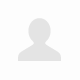
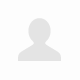

In [16]:
# 페이지 소스 출력
soup

In [17]:
# 클래스 속성이 detail_info인 객체 리턴
detail_info = soup.select_one(".detail_info")
img = detail_info.select_one("._img")

# src 속성의 값(영화 포스터 url)
poster = img['src']

# 영화 포스터 url 출력
print("poster=", poster)

poster= https://search.pstatic.net/common?type=o&size=174x242&quality=85&direct=true&src=https%3A%2F%2Fs.pstatic.net%2Fmovie.phinf%2F20230508_234%2F1683510751767I8t1j_JPEG%2Fmovie_image.jpg%3Ftype%3Dw640_2


In [18]:
info_group = soup.select_one(".info.txt_4")
dd_list = info_group.select("dd")
open_date = dd_list[0].text
print("open_date=", open_date)

degree = dd_list[1].text
print("degree=", degree)

genre = dd_list[2].text
print("genre=", genre)

country = dd_list[3].text
print("country=", country)

movie_time = dd_list[4].text
print("movie_time=", movie_time)

company = dd_list[5].text
print("company=", company)

open_date= 2023.05.31.
degree= 15세 관람가
genre= 범죄, 액션
country= 대한민국
movie_time= 105분
company= 에이비오엔터테인먼트, 플러스엠 엔터테인먼트


In [20]:
synopsis = soup.select_one(".text._content_text").text
print("synopsis=", synopsis)

synopsis= 대체불가 괴물형사 마석도, 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤, ‘마석도’(마동석)는 새로운 팀원들과 함께 살인사건을 조사한다. 사건 조사 중, ‘마석도’는 신종 마약 사건이 연루되었음을 알게 되고 수사를 확대한다. 한편, 마약 사건의 배후인 '주성철'(이준혁)은 계속해서 판을 키워가고 약을 유통하던 일본 조직과 '리키'(아오키 무네타카)까지 한국에 들어오며 사건의 규모는 점점 더 커져가는데... 나쁜 놈들 잡는 데 이유 없고 제한 없다. 커진 판도 시원하게 싹 쓸어버린다!
